In [3]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import plotly.express as px

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [4]:
aplicaciones_df = pd.read_csv("aplicaciones.csv")
aplicaciones_df

Cliente  Edad  Score      Saldo
0     15647311    41    608   8380.786
1     15619304    42    502  15966.080
2     15737888    43    850  12551.082
3     15574012    44    645  11375.578
4     15656148    29    376  11504.674
...        ...   ...    ...        ...
6378  15769959    53    597   8838.121
6379  15569266    28    644  15506.041
6380  15569892    35    516   5736.961
6381  15682355    42    772   7507.531
6382  15628319    28    792  13014.279

[6383 rows x 4 columns]

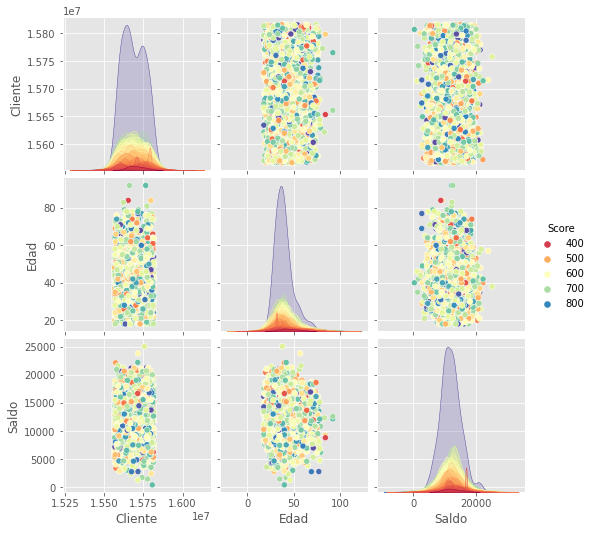

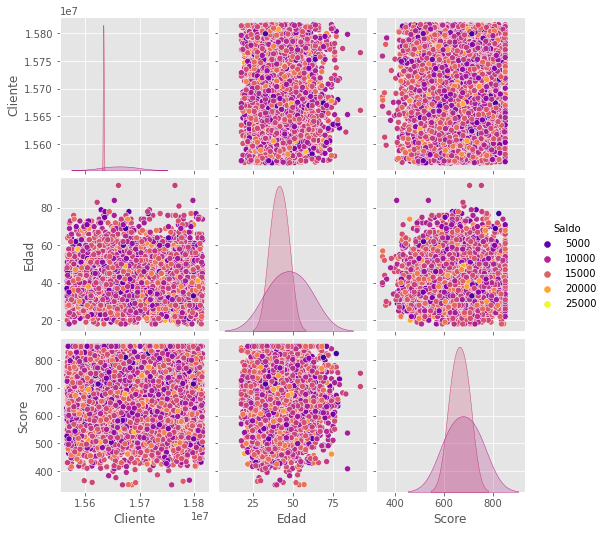

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

smp = sns.pairplot(aplicaciones_df,hue="Score",diag_kind='kde',palette="Spectral")
smp = sns.pairplot(aplicaciones_df,hue="Saldo",diag_kind='kde',palette="plasma")

Matriz de Covarianzas


Cliente         Edad         Score         Saldo
Cliente  5.173800e+09 -4802.792437  88914.169960 -1.881076e+06
Edad    -4.802792e+03   109.750938     -9.623124 -4.042534e+02
Score    8.891417e+04    -9.623124   9396.318328 -1.383987e+03
Saldo   -1.881076e+06  -404.253438  -1383.986978  9.057124e+06

<AxesSubplot:>

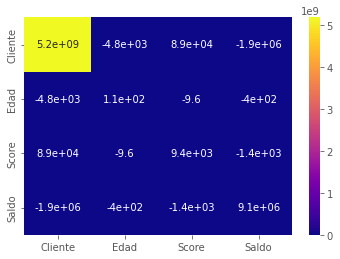

In [6]:
#Empecemos con las estadisticas descriptivas multivariadas 
features = ['Cliente','Edad','Score','Saldo']
print('Matriz de Covarianzas')
display(aplicaciones_df[features].cov())
sns.heatmap(aplicaciones_df[features].cov(),cmap="plasma", annot=True)

##### De la matriz de covarianzas podemos observar que fuera de las variables en la diagonal que van a estar realcionadas de forma mas alta, notamos que las variables cliente y score son las mas realcionadas, caso contrario con las demas variables en las que tenemos valores negativos lo cual nos dice que no estan relacionadas, ademas era de esperar que la variable cliente este mas relacionada con el score ya que es bien sabido que el score de cada persona depende unicamente de ella y la forma en que se maneje financieramente hablando.

Matriz de Correlaciones


Cliente      Edad     Score     Saldo
Cliente  1.000000 -0.006374  0.012752 -0.008690
Edad    -0.006374  1.000000 -0.009476 -0.012822
Score    0.012752 -0.009476  1.000000 -0.004744
Saldo   -0.008690 -0.012822 -0.004744  1.000000

<AxesSubplot:>

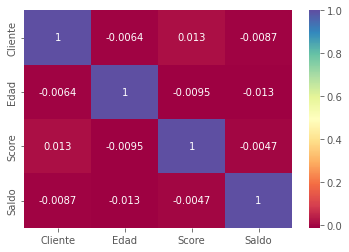

In [7]:
print("Matriz de Correlaciones")
display(aplicaciones_df[features].corr())
sns.heatmap(aplicaciones_df[features].corr(),cmap="Spectral", annot=True)

#### Ahora realizaremos algunos graficos para ver si tenemos algunos outiliers en nuestra base de datos

##### De forma analoga a la matriz de covarianzas en esta nueva grafica muestra como las variables Score y Cliente son las mas correlacionadas 

In [8]:
fig = px.violin(y = aplicaciones_df.Score, box = True)
fig.update_traces(fillcolor = 'green',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'red', # Color del box plot
                  opacity = 0.5) 
fig.show()

In [9]:
fig = px.violin(y = aplicaciones_df.Edad, box = True)
fig.update_traces(fillcolor = 'maroon',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'cadetblue', # Color del box plot
                  opacity = 0.5) 
fig.show()

In [10]:
fig = px.violin(y = aplicaciones_df.Saldo, box = True)
fig.update_traces(fillcolor = 'crimson',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'black', # Color del box plot
                  opacity = 0.5) 
fig.show()

#### De los graficos realizados podemos observar que las variables Score, Saldo Y Edad muestran tener algunos outliers, sin embargo al menos para el caso de la variable Edad estos datos observados fuera de los rangos no necesariamente estarian indicando que estos son outliers sino valores extremos, caso contrario a las otras 2 variable en las que si podrian ser outilers.

In [11]:
#Lo que sigue es estandarizar nuestros datos y aplicarles las transformacion de box cox
columns = ["Cliente","Edad","Score","Saldo"]
def getStdDataMatrix(aplicaciones_df,columns,keys):
    aplicaciones_df = aplicaciones_df.copy(deep=True)
    meanVector = aplicaciones_df[columns].mean().to_dict()
    stdVector = aplicaciones_df[columns].std().to_dict()
    for col in columns:
        aplicaciones_df['std_'+col] = (aplicaciones_df[col]-meanVector[col])/stdVector[col]
    return aplicaciones_df[keys+['std_'+col for col in columns]]

### Transformacion de Yeo Johnson y Boxcox

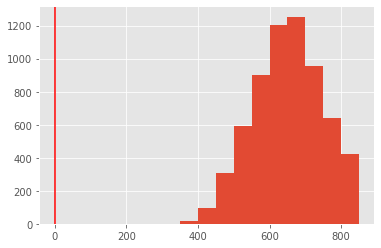

In [12]:
plt.hist(aplicaciones_df.Score)
plt.axvline(x=0, color="r")  # verificar que también hay datos por debajo de 0
plt.show()

(array([1.000e+01, 8.200e+01, 4.180e+02, 1.255e+03, 2.089e+03, 1.647e+03,
        6.790e+02, 1.730e+02, 2.800e+01, 2.000e+00]),
 array([  376.869,  2848.163,  5319.457,  7790.751, 10262.045, 12733.339,
        15204.633, 17675.927, 20147.221, 22618.515, 25089.809]),
 <BarContainer object of 10 artists>)

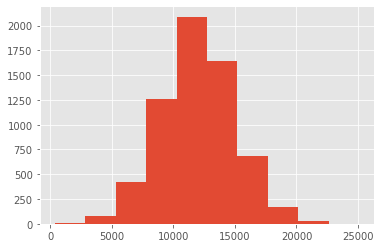

In [13]:
plt.hist(aplicaciones_df.Saldo)

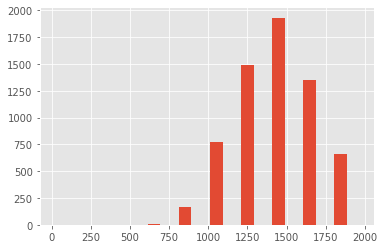

In [14]:
from scipy.stats import yeojohnson
plt.hist(yeojohnson(aplicaciones_df.Score))
plt.show()

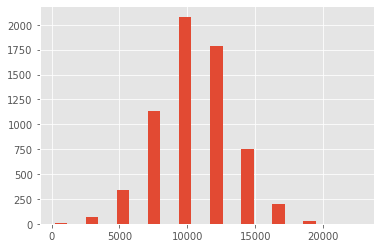

In [15]:
from scipy.stats import yeojohnson
plt.hist(yeojohnson(aplicaciones_df.Saldo))
plt.show()

In [16]:
transformacion_df = yeojohnson(aplicaciones_df.Saldo)
transformacion_df

(array([ 7732.54977302, 14636.33740854, 11533.53318497, ...,
         5313.34349656,  6934.47578001, 11954.83667627]),
 0.9899745872706693)

In [17]:
transformacion_2_df = yeojohnson(aplicaciones_df.Score)
transformacion_2_df


(array([1350.83902646, 1084.92176246, 1982.23069949, ..., 1119.61066203,
        1775.43792567, 1828.1841452 ]),
 1.145541632379817)

Lambda value used for Transformation: 0.9899759648810006


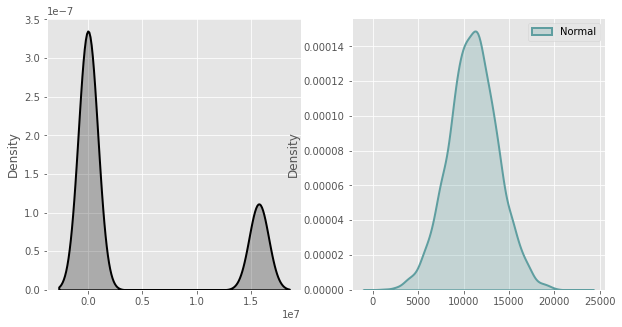

In [18]:
from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(aplicaciones_df.Saldo)

fig, ax = plt.subplots(1, 2)

# fitted data (normal)
sns.distplot(aplicaciones_df, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="black", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="cadetblue" ,ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 1.14521004221623


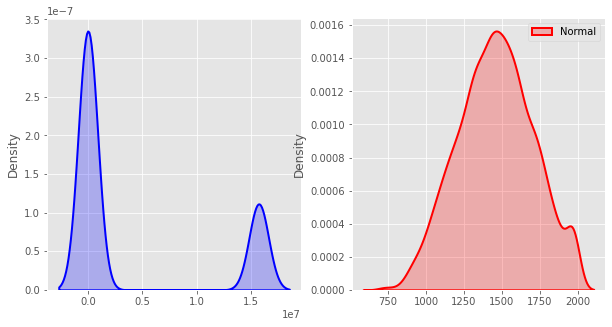

In [19]:
fitted_data_2, fitted_lambda_2 = stats.boxcox(aplicaciones_df.Score)

fig, ax = plt.subplots(1, 2)

# fitted data (normal)
sns.distplot(aplicaciones_df, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="blue", ax = ax[0])
 
sns.distplot(fitted_data_2, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="red", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda_2}")

Lambda value used for Transformation: -0.174724347768571


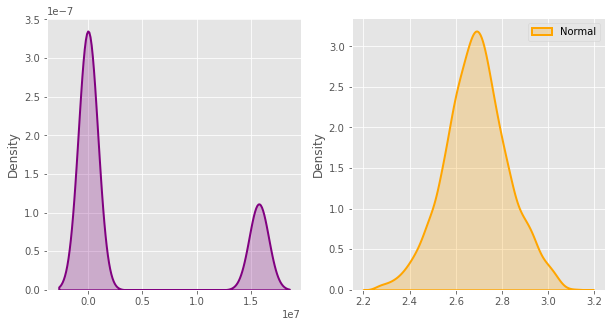

In [20]:
fitted_data_3, fitted_lambda_3 = stats.boxcox(aplicaciones_df.Edad)

fig, ax = plt.subplots(1, 2)

# fitted data (normal)
sns.distplot(aplicaciones_df, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="purple", ax = ax[0])
 
sns.distplot(fitted_data_3, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="orange", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda_3}")

In [21]:
data_1 = pd.DataFrame(fitted_data)
data_2 = pd.DataFrame(fitted_data_2)
data_3 = pd.DataFrame(fitted_data_3)

### Matriz de dispersion

In [22]:
from scipy import sparse

input_matrix = np.array(fitted_data)
print("The input matrix is:")
print(input_matrix)
sparse_matrix = sparse.csr_matrix(input_matrix)
print("The sparse matrix is:")
print(sparse_matrix)

The input matrix is:
[ 7731.72183357 14635.60465833 11532.75736711 ...  5312.48256515
  6933.63695979 11954.06667696]
The sparse matrix is:
  (0, 0)	7731.721833565796
  (0, 1)	14635.604658331898
  (0, 2)	11532.757367108794
  (0, 3)	10462.84218813532
  (0, 4)	10580.3944409117
  (0, 5)	13036.528529912104
  (0, 6)	12359.691122044354
  (0, 7)	9393.272960041064
  (0, 8)	13134.503464835805
  (0, 9)	12177.76720817067
  (0, 10)	12560.745071897474
  (0, 11)	12972.775495633176
  (0, 12)	5525.8541524639195
  (0, 13)	7869.074046820186
  (0, 14)	10131.023354911023
  (0, 15)	12328.795981363437
  (0, 16)	13328.082065898265
  (0, 17)	7068.346292041803
  (0, 18)	6501.3521546098655
  (0, 19)	11260.850496155748
  (0, 20)	10796.40522136151
  (0, 21)	12067.897683983723
  (0, 22)	14297.079478014208
  (0, 23)	10068.038832706505
  (0, 24)	10307.10235170044
  :	:
  (0, 6358)	7676.109581318911
  (0, 6359)	11570.070427837654
  (0, 6360)	10891.989636384975
  (0, 6361)	14079.787261901442
  (0, 6362)	13851.83877682

In [23]:
from scipy import sparse

input_matrix_2 = np.array(fitted_data_2)
print("The input matrix is:")
print(input_matrix_2)
sparse_matrix_2 = sparse.csr_matrix(input_matrix_2)
print("The sparse matrix is:")
print(sparse_matrix_2)

The input matrix is:
[1345.82161237 1080.53054532 1975.70874245 ... 1115.1379427  1769.41177031
 1822.03181362]
The sparse matrix is:
  (0, 0)	1345.8216123702064
  (0, 1)	1080.530545318207
  (0, 2)	1975.7087424548047
  (0, 3)	1440.0832358697312
  (0, 4)	775.8134344450948
  (0, 5)	1078.0639014675864
  (0, 6)	1540.293333266994
  (0, 7)	1144.9102921262652
  (0, 8)	1366.1336688207068
  (0, 9)	1460.5691721169048
  (0, 10)	1727.4577962041903
  (0, 11)	1259.933349972392
  (0, 12)	859.1551238878378
  (0, 13)	1157.3445962423207
  (0, 14)	1207.249973959572
  (0, 15)	1014.1857225102661
  (0, 16)	1050.9782689664885
  (0, 17)	1853.696901703558
  (0, 18)	1280.0775124052072
  (0, 19)	989.7506053371933
  (0, 20)	1214.7586479551808
  (0, 21)	1933.1583212119137
  (0, 22)	1478.5243023197197
  (0, 23)	1779.9201106051578
  (0, 24)	1919.885500004849
  :	:
  (0, 6358)	1394.1252664314616
  (0, 6359)	1023.9807937793918
  (0, 6360)	1383.938185541178
  (0, 6361)	1105.2360338499332
  (0, 6362)	1120.0930839452028


In [24]:
from scipy import sparse

input_matrix_3 = np.array(fitted_data_3)
print("The input matrix is:")
print(input_matrix_3)
sparse_matrix_3 = sparse.csr_matrix(input_matrix_3)
print("The sparse matrix is:")
print(sparse_matrix_3)

The input matrix is:
[2.73204217 2.74461018 2.75683148 ... 2.64819339 2.74461018 2.5259313 ]
The sparse matrix is:
  (0, 0)	2.7320421737503646
  (0, 1)	2.7446101788664117
  (0, 2)	2.7568314807426444
  (0, 3)	2.7687233796434
  (0, 4)	2.5454753766350144
  (0, 5)	2.7687233796434
  (0, 6)	2.5055495222805573
  (0, 7)	2.5822904150114616
  (0, 8)	2.7803019438291687
  (0, 9)	2.9079483878719152
  (0, 10)	2.6632923050135635
  (0, 11)	2.7568314807426444
  (0, 12)	2.5454753766350144
  (0, 13)	2.6632923050135635
  (0, 14)	2.7320421737503646
  (0, 15)	2.7803019438291687
  (0, 16)	2.5822904150114616
  (0, 17)	2.616415546227066
  (0, 18)	2.7320421737503646
  (0, 19)	2.8439638785105377
  (0, 20)	2.932646884890695
  (0, 21)	2.8237670794373524
  (0, 22)	2.932646884890695
  (0, 23)	2.599666210933345
  (0, 24)	2.5055495222805573
  :	:
  (0, 6358)	2.616415546227066
  (0, 6359)	2.648193391599133
  (0, 6360)	2.813302114210526
  (0, 6361)	2.719108805830904
  (0, 6362)	2.7446101788664117
  (0, 6363)	2.632578991

In [25]:
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
X = data_1
# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[6014148.78724023]]
MLE:
[[7506908.76703428]]


In [26]:
import numpy as np
from sklearn.covariance import EllipticEnvelope

datos = np.column_stack((data_1, data_2, data_3))

envolvente = EllipticEnvelope(contamination=0.001) 
envolvente.fit(datos)

# Identificar los puntos anómalos
outliers = envolvente.predict(datos)

# Imprimir los índices de los puntos anómalos
print("Índices de los puntos anómalos:")
print(np.where(outliers == -1))

Índices de los puntos anómalos:
(array([1351, 2122, 2278, 3370, 4291, 5396, 5997], dtype=int64),)


#### inciso d)

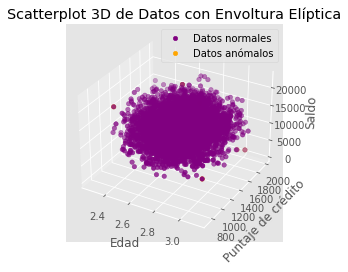

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.covariance import EllipticEnvelope

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3, data_2, data_1, c='purple', marker='o', label='Datos normales')
ax.scatter(data_3[outliers == -1], data_2[outliers == -1], data_1[outliers == -1], c = "orange", marker='o', label='Datos anómalos')
# Etiquetas de los ejes
ax.set_xlabel('Edad')
ax.set_ylabel('Puntaje de crédito')
ax.set_zlabel('Saldo')

# Título del gráfico
plt.title('Scatterplot 3D de Datos con Envoltura Elíptica')

# Mostrar la leyenda
plt.legend()

# Mostrar el scatterplot
plt.show()

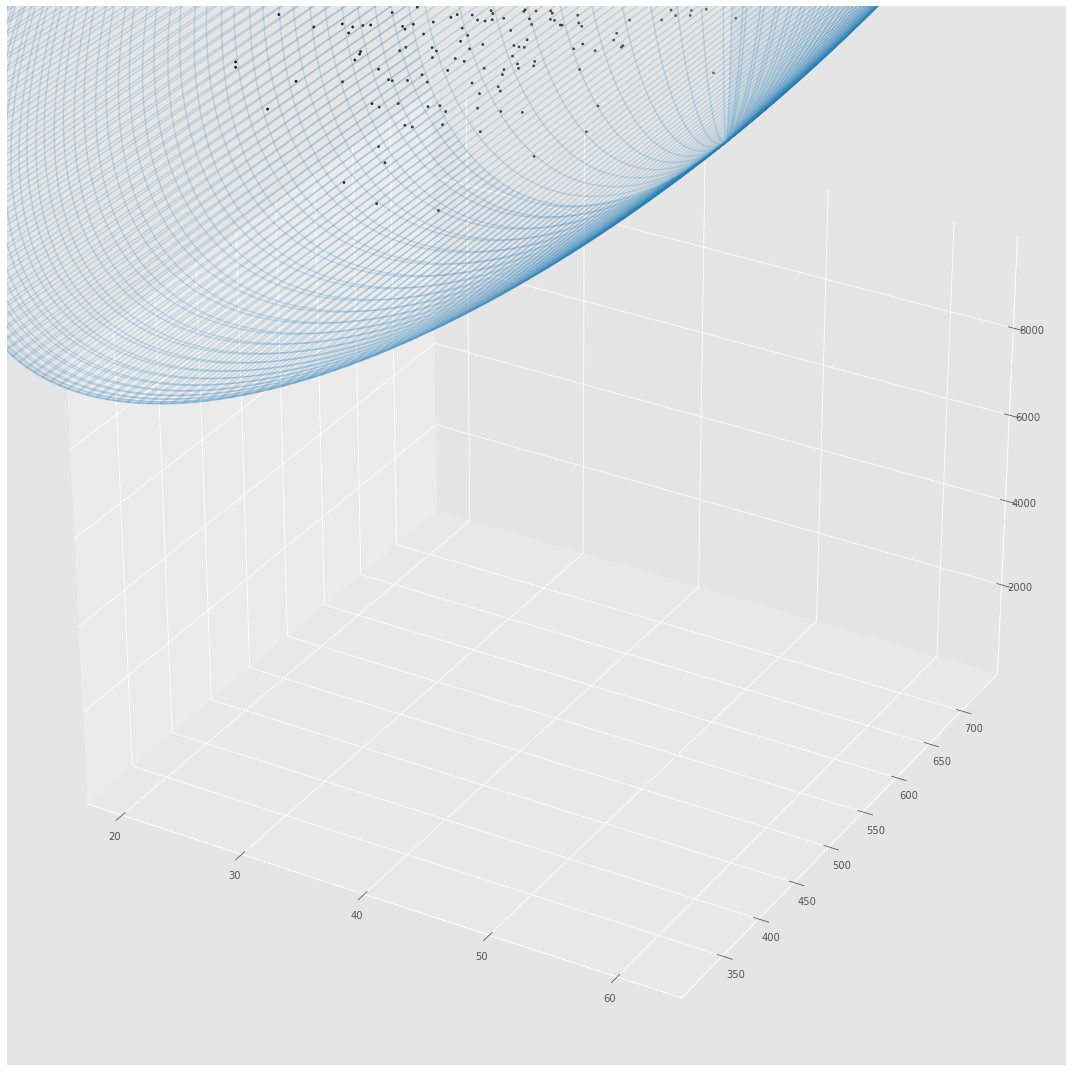

In [72]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nestle

# Generar puntos aleatorios para edad, puntaje de crédito y saldo de 100 personas
np.random.seed(42)
edad = np.random.randint(18, 65, 100)
score_credito = np.random.randint(300, 750, 100)
saldo = np.random.uniform(0, 10000, 100)
datos = np.column_stack((data_3, data_2, data_1))

# Definir la función para trazar elipses en 3D
def plot_ellipsoid_3d(ell, ax):
    """Función para trazar elipses en 3D."""
    # Puntos en la esfera unitaria
    u = np.linspace(0.5, 2.0 * np.pi, 500)
    v = np.linspace(0.5, np.pi, 500)
    z = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    x = np.outer(np.ones_like(u), np.cos(v))
    # Transformar puntos a la elipse
    for i in range(len(x)):
        for j in range(len(x)):
            x[i, j], y[i, j], z[i, j] = ell.ctr + np.dot(ell.axes, [x[i, j], y[i, j], z[i, j]])
    # Trazar la elipse en el gráfico 3D
    ax.plot_wireframe(x, y, z, rstride=4, cstride=4, color='#2980b9', alpha=0.2)

# Volumen del toro
torus_vol = 5. * np.pi**2 * R * r**2

# Determinar elipsoides de límites
pointvol = torus_vol / npoints
ells = nestle.bounding_ellipsoids(datos, pointvol=pointvol)

# Graficar
fig = plt.figure(figsize=(15., 15.))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datos[:, 0], datos[:, 1], datos[:, 2], c='k', marker='.')
for ell in ells:
    plot_ellipsoid_3d(ell, ax)

# Establecer límites y aspecto igual
ax.set_xlim(edad.min(), edad.max())
ax.set_ylim(score_credito.min(), score_credito.max())
ax.set_zlim(saldo.min(), saldo.max())
ax.set_aspect('auto')

# Ajustar diseño
fig.tight_layout()

# Mostrar el gráfico
plt.show()